In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import os
# from urllib.request import urlretrieve

# def get_data(filename=None, url=None, force_download=False):
#     filename = url.split('/')[-1]
#     if force_download or not os.path.exists(filename):
#         urlretrieve(url, filename)

In [3]:
# url_gender_sub = "https://www.kaggle.com/c/titanic/download/gender_submission.csv"
# url_test = "https://www.kaggle.com/c/titanic/download/test.csv"
# url_train = "https://www.kaggle.com/c/titanic/download/train.csv"

# urls = [url_gender_sub, url_test, url_train]

# for url in urls:
#     get_data(url=url)

In [4]:
dt_train = pd.read_csv('train.csv')
dt_test = pd.read_csv('test.csv')
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Examining Data

In [5]:
dt_train.shape

(891, 12)

In [7]:
dt_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data cleaning

#### Filling NAs

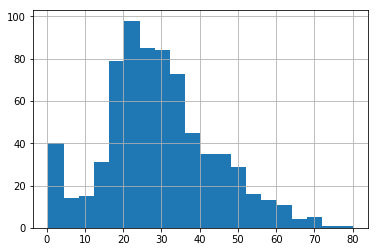

In [8]:
dt_train['Age'].hist(bins=20)

In [9]:
# fill in missing values for Age feature
age_count = dt_train['Age'].value_counts(normalize=True)
age_missing = dt_train['Age'].isnull()
dt_train.loc[age_missing, 'Age' ] = np.random.choice(age_count.index,
                                                age_missing.sum(), 
                                                 p=age_count.values)

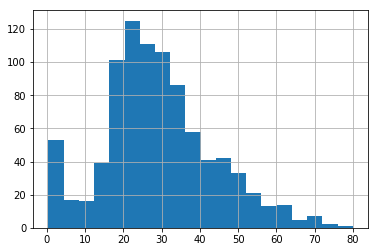

In [10]:
dt_train['Age'].hist(bins=20)

In [11]:
# fill in the missing values for embarked column
dt_train['Embarked'].fillna(method='ffill', inplace=True)

In [12]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
dt_train.drop(labels=cols_drop, axis=1, inplace=True)
#dt_train.head()

In [13]:
dt_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### Examining the features

In [14]:
np.unique(dt_train['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [15]:
agg_embarked = dt_train.groupby('Embarked')['Survived'].sum()

<Container object of 3 artists>

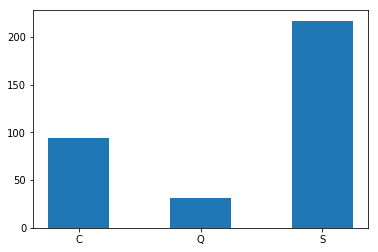

In [16]:
plt.bar(agg_embarked.index, agg_embarked.values, width=0.5)

In [17]:
y_col = "Survived"
X_train = dt_train.drop(labels=y_col, axis=1)
X_train['Pclass'] = X_train['Pclass'].astype('str')
X_train = pd.get_dummies(X_train)
y_train = dt_train['Survived']

In [18]:
# do necessary normalization o columns
cols_to_norm = ['Age', 'SibSp', 'Parch', 'Fare']
normed_cols = (X_train[cols_to_norm] - X_train[cols_to_norm].mean(axis=0))\
/X_train[cols_to_norm].std(axis=0)

X_train.drop(labels=cols_to_norm, axis=1, inplace=True)
X_train = pd.concat([normed_cols, X_train], axis=1)

In [19]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.513989,0.432550,-0.473408,-0.502163,0,0,1,0,1,0,0,1
1,0.589344,0.432550,-0.473408,0.786404,1,0,0,1,0,1,0,0
2,-0.238155,-0.474279,-0.473408,-0.488580,0,0,1,1,0,0,0,1
3,0.382469,0.432550,-0.473408,0.420494,1,0,0,1,0,0,0,1
4,0.382469,-0.474279,-0.473408,-0.486064,0,0,1,0,1,0,0,1


### Modelling

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, random_state=2)

In [219]:
# get baseline using naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB(priors=None)

In [220]:
pred = model.predict(Xtest) 

np.mean(pred == ytest)

0.78923766816143492

In [216]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', class_weight='balanced')
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
             'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc, param_grid)
grid.fit(X_train, y_train)
# print(grid.)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [217]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.005}


In [218]:
grid.best_score_

0.78900112233445563

In [74]:
# try RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

In [75]:
np.mean(ypred == ytest)

0.80717488789237668

In [34]:
rf = RandomForestClassifier()
rf_param_grid = {'n_estimators': [5000, 7000, 10000]}
grid_rf = GridSearchCV(rf, rf_param_grid)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000, 7000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
grid_rf.best_params_

{'n_estimators': 7000}

In [36]:
grid_rf.best_score_

0.80134680134680136

#### Test Data

In [185]:
dt_test = pd.read_csv('test.csv')
dt_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [186]:
dt_test.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [187]:
dt_test.shape

(418, 11)

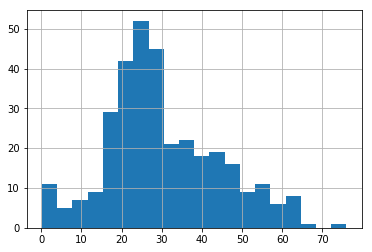

In [188]:
dt_test['Age'].hist(bins=20)

In [189]:
# check if na values are random in data
na_index = dt_test.loc[dt_test['Age'].isnull(), :].index

In [190]:
def fill_age_na(data):
    """"""
    age_count = data['Age'].value_counts(normalize=True)
    age_missing = data['Age'].isnull()
    data.loc[age_missing, 'Age' ] = np.random.choice(age_count.index,
                                                age_missing.sum(), 
                                                 p=age_count.values)
    return data

def otherClean(data):
    """"""
    data['Embarked'].fillna(method='ffill', inplace=True)
    cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    data = data.drop(labels=cols_drop, axis=1, inplace=False)
    data['Pclass'] = data['Pclass'].astype('str')
    data = pd.get_dummies(data)
    data['Fare'].fillna(value=np.mean(data['Fare']), inplace=True)
    
    return data
    
def get_train_test(data, y_col):
    """method for extracting the feature matrix and target column"""
    X = data.drop(labels=y_col, axis=1)
    y = data[y_col]
    
    return X, y

def standardize(data, cols):
    
    normed_cols = (data[cols] - data[cols].mean(axis=0))\
                    /data[cols].std(axis=0)

    data.drop(labels=cols_to_norm, axis=1, inplace=True)
    data = pd.concat([normed_cols, data], axis=1)
    
    return data

def pred_change(old, new, target):
    
    return np.sum(old[target] != new[target])/old.shape[0]
    

In [192]:
X_test = fill_age_na(dt_test)
X_test = otherClean(X_test)
X_test = standardize(X_test, ['Age', 'SibSp', 'Parch', 'Fare'])


__Random Forest__

In [201]:
rf = RandomForestClassifier(n_estimators=7000, random_state=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

submit = pd.DataFrame({'PassengerId': dt_test['PassengerId'],
            'Survived': rf_pred})
submit.to_csv('submission.csv', index=False)

__RF with grid search__

In [234]:
rf = RandomForestClassifier(random_state=50)
rf_param_grid = {'n_estimators': [10, 50, 100, 1000, 2000, 5000]}
grid_rf = GridSearchCV(rf, rf_param_grid)
grid_rf.fit(X_train, y_train);
grid_rf.best_params_, grid_rf.best_score_

rf_new = grid_rf.best_estimator_.predict(X_test)
rf_submit = pd.DataFrame({'PassengerId': dt_test['PassengerId'],
            'Survived': rf_new})
submit.to_csv('rf_submission.csv', index=False)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 1000, 2000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Check prediction change

In [244]:
old = pd.read_csv('submission.csv')
pred_change(old, rf_submit, target='Survived')

0.0095693779904306216